In [4]:
import numpy as np
import scipy
import scipy.signal as signal
import thinkdsp
import thinkplot
import urllib.request
import sys
import logging
import math
import os
import pydub  
import scipy
# import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from pylab import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio

In [5]:
def find_prominent_freqeuencies(filename):
#     print ('in function filename: ', filename)
    fs, data = wavfile.read(filename) # load the data
#     print ('monon/stereo : ', data.shape)
    if len(data.shape) > 1:# this is a two channel soundtrack, I get the first track
        a1 = data.T[0] 
        a = a1[:1024]
    else:
        a1 = data
        a = a1[:1024]
    
    c = fft(a) # create a list of complex number
#     print ('fftshape: ', c.shape)
#     print ('fftlen: ', len(c))
    d = len(c)/2  # you only need half of the fft list
#     plt.plot(abs(c[:int(d-1)]),'r')
#     plt.show()
    c_abf_fil = np.absolute(c[:int(d-1)])
    c_abs = c_abf_fil[:26]#c[26] represents 812.5 Hz
    
#     for i in range(7):
#         c_abs [i] = 0 
    
#     print 'absolute c: ', c_abs
    mcr = np.sum(c_abs)
    mcr = mcr/len(c_abs)
#     print ('MEAN: ', mcr )
#     print ('MAX : ', np.max(c_abs))
    collection={}
    for i in range(len(c_abs)):
        if c_abs[i] >= (1.27*mcr):
            collection[i] = c_abs[i]
        else:
            collection[i] = 0
#     print 'short listed: ',collection
#     print ('short listed len: ',len(collection), '  len original: ', len(c_abs))
#     print ('Key Value pairs:',collection)
#     plt.plot(collection.values(), 'g')
#     plt.xlim((0,30))   
    plt.show()
    return collection

In [6]:
# for trucks audio sample
import glob

list_collection = []
# dir_path = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/trucks/'
dir_path = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/'
for wavf in glob.glob(dir_path+'*.wav'):
#     print 'filename ', wavf
    coll = find_prominent_freqeuencies(wavf)
    list_collection.append(coll)

In [7]:
# for trucks audio sample
coll2 = {}
fileCount = 0
for i,colli in enumerate(list_collection):
#     print coll
#     print i, 'th colletion: '
#     print coll.keys()
    fileCount = fileCount + 1
    for k in colli.keys():
        if k >= 0 and colli[k] > 1.0:#if k >= 7 and colli[k] > 1.0:
            if k in coll2:
                coll2[k] = (coll2[k][0]+1,coll2[k][1]+colli[k])
            else:
                coll2[k] = (1, colli[k])
print ('fileCount:',fileCount)
for k in coll2.keys():
    coll2[k] = (coll2[k][0]/(fileCount*len(coll2.keys())) , coll2[k][1]/(coll2[k][0]))
    
print ('KEYS: ', len(coll2.keys()))
for key in sorted(coll2):
    print ('key: ', key , ' val: ', coll2[key])
# for key in sorted(coll2):
#      print (coll2[key][0],',')

fileCount: 600
KEYS:  26
key:  0  val:  (0.00608974358974359, 493177.63157894736)
key:  1  val:  (0.01891025641025641, 983826.9386483829)
key:  2  val:  (0.017435897435897435, 681987.3652403081)
key:  3  val:  (0.01653846153846154, 1097679.2593767622)
key:  4  val:  (0.017756410256410258, 710990.4309852595)
key:  5  val:  (0.01903846153846154, 916521.7003735271)
key:  6  val:  (0.016474358974358973, 762553.0291873703)
key:  7  val:  (0.010833333333333334, 733004.7744141924)
key:  8  val:  (0.012884615384615385, 894188.1969656912)
key:  9  val:  (0.013397435897435897, 860530.3203927211)
key:  10  val:  (0.010576923076923078, 782225.0223885921)
key:  11  val:  (0.0075, 584368.3001830429)
key:  12  val:  (0.008782051282051282, 629235.2824972909)
key:  13  val:  (0.006025641025641026, 556782.5712836201)
key:  14  val:  (0.004487179487179487, 736646.0805008225)
key:  15  val:  (0.006217948717948718, 648757.224813361)
key:  16  val:  (0.006025641025641026, 584338.539028947)
key:  17  val:  (

In [8]:
# for no trucks audio sample
import glob

list_collection_2 = []
# dir_path_2 = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/no_trucks/'
dir_path_2 = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/'
for wavf in glob.glob(dir_path_2+'*.wav'):
#     print 'filename ', wavf
    coll_no_trucks = find_prominent_freqeuencies(wavf)
    list_collection_2.append(coll_no_trucks)

In [9]:
# for no trucks audio sample
coll2_no_trucks = {}
no_fileCount = 0
for i,collo in enumerate(list_collection_2):
#     print coll
#     print i, 'th colletion: '
#     print coll.keys()
    no_fileCount = no_fileCount + 1
    for k in collo.keys():
        if k >= 0 and collo[k] > 1.0:#if k >= 7 and collo[k] > 1.0:
            if k in coll2_no_trucks:
                coll2_no_trucks[k] = (coll2_no_trucks[k][0]+1,coll2_no_trucks[k][1]+collo[k])
            else:
                coll2_no_trucks[k] = (1, collo[k])
                
for k in coll2_no_trucks.keys():
    coll2_no_trucks[k] = (coll2_no_trucks[k][0]/(no_fileCount*len(coll2_no_trucks.keys())) , coll2_no_trucks[k][1]/(coll2_no_trucks[k][0]))        
    
print ('KEYS: ', len(coll2_no_trucks.keys()))
for key in sorted(coll2_no_trucks):
    print ('key: ', key , ' val: ', coll2_no_trucks[key])
# for key in sorted(coll2_no_trucks):
#      print (coll2_no_trucks[key][0],',')

KEYS:  26
key:  0  val:  (0.0035897435897435897, 448626.76785714284)
key:  1  val:  (0.01, 1130536.047938308)
key:  2  val:  (0.01358974358974359, 762529.3620528056)
key:  3  val:  (0.013525641025641025, 866504.8169505856)
key:  4  val:  (0.014038461538461538, 815324.8640673618)
key:  5  val:  (0.011282051282051283, 572762.4028286206)
key:  6  val:  (0.009807692307692307, 635765.1223234184)
key:  7  val:  (0.015128205128205128, 1224687.7907447303)
key:  8  val:  (0.013461538461538462, 931807.3287580165)
key:  9  val:  (0.013653846153846154, 646051.9607485983)
key:  10  val:  (0.011666666666666667, 663268.6730324831)
key:  11  val:  (0.010576923076923078, 741036.5625692841)
key:  12  val:  (0.012435897435897436, 789979.8375799004)
key:  13  val:  (0.006987179487179487, 616111.5924822125)
key:  14  val:  (0.008333333333333333, 770530.6468923269)
key:  15  val:  (0.006987179487179487, 767904.1626160289)
key:  16  val:  (0.010769230769230769, 640890.7781935111)
key:  17  val:  (0.005705128

In [18]:
def print_Probability(myFile):
    truck_d = find_prominent_freqeuencies(myFile)
#     print (truck_d)
    td = {}
    for k in truck_d.keys():
            if  k >= 0 and truck_d[k] > 1.0:#if  k >= 7 and truck_d[k] > 1.0:
                if k in td:
                    td[k] = (td[k][0]+1,td[k][1]+truck_d[k])
                else:
                    td[k] = (1, truck_d[k])

    for k in td.keys():
        td[k] = (td[k][0]/len(coll2.keys()), td[k][1])
        
#     for key in sorted(td.keys()):
#         print ('key: ', key , ' val: ', td[key])
    Output_prob = 1.0
    Output_prob_truck = 1.0
    Output_prob_no_truck = 1.0

    for k in coll2.keys():#td.keys():
        if(k in td.keys()):
            #if(k >= 0 and td[k][1] > 1.0):#if(k >= 7 and td[k][1] > 1.0):
                #if(td[k][1] > (0.7*coll2[k][1])):
            Output_prob = coll2[k][0]*Output_prob#*(td[k][1]/coll2[k][1])
#                 else:
#                     Output_prob = 0.00001*Output_prob#*(td[k][1]/coll2[k][1])#*td[k][0]
        else:
            Output_prob = 0.00001*Output_prob#*(1/coll2_no_trucks[k][1])
    Output_prob_truck = 0.5*Output_prob
    
    Output_prob = 1.0
    for k in coll2_no_trucks.keys():#td.keys():
        if(k in td.keys()):
            #if(k >= 0 and td[k][1] > 1.0):#if(k >= 7 and td[k][1] > 1.0):
                #if(td[k][1] > (0.7*coll2_no_trucks[k][1])):
            Output_prob = coll2_no_trucks[k][0]*Output_prob#*(td[k][1]/coll2_no_trucks[k][1])
#                 else:
#                     Output_prob = 0.00001*Output_prob#*(td[k][1]/coll2_no_trucks[k][1])#*td[k][0]
        else:
            Output_prob = 0.00001*Output_prob#*(1/coll2_no_trucks[k][1])
    Output_prob_no_truck = 0.5*Output_prob
    plt.plot(truck_d.values(), 'g')
    plt.xlim((0,30))
#     print ('Truck Prob: ',Output_prob_truck)
#     print ('Not Truck Prob: ',Output_prob_no_truck)
    if Output_prob_truck >= Output_prob_no_truck:
        print ('***Truck***')#,Output_prob_truck)
        return 1
    else:
        print ('Not a Truck')# ',Output_prob_no_truck)
        return 0
        

/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-15-05-.wav
***Truck***


1

----------------------------------
/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/Non-Truck-6-02-.wav


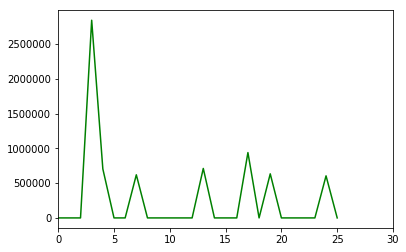

Not a Truck


0

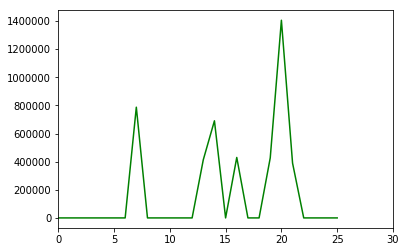

In [26]:
new_truck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/Truck-15-05-.wav'
new_nontruck_audio = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/Non-Truck-6-02-.wav'

# for myFile in glob.glob(new_truck_audio+"*.wav"):
# print (new_truck_audio)
print_Probability(new_truck_audio)
print ('----------------------------------')
# print (new_nontruck_audio)
print_Probability(new_nontruck_audio)

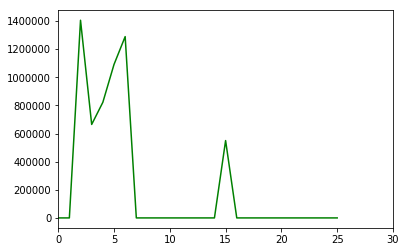

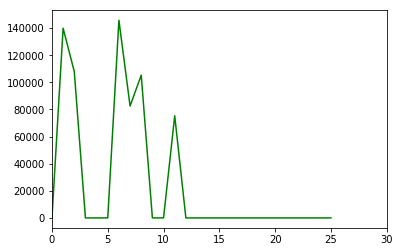

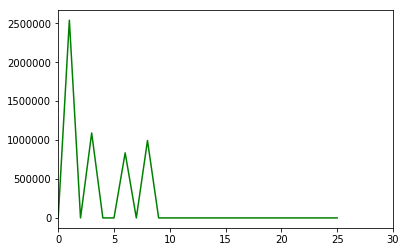

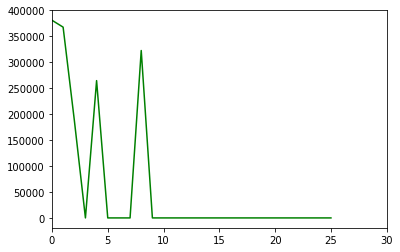

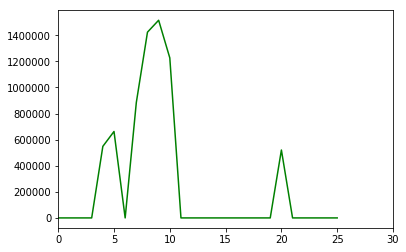

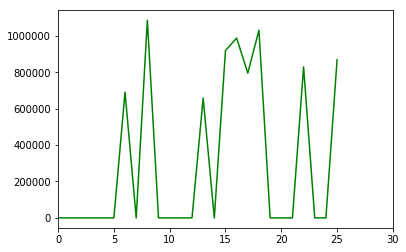

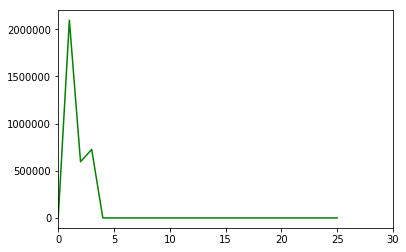

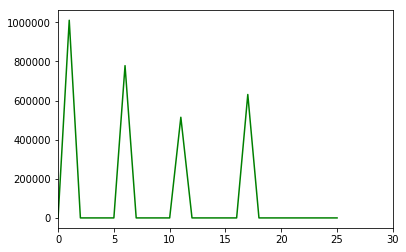

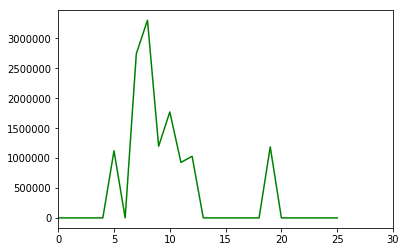

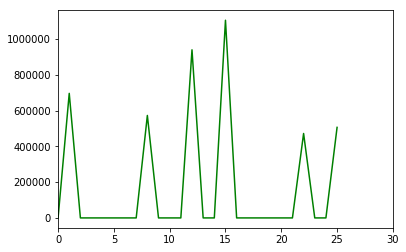

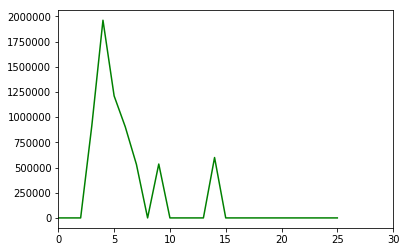

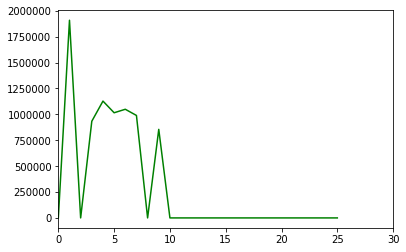

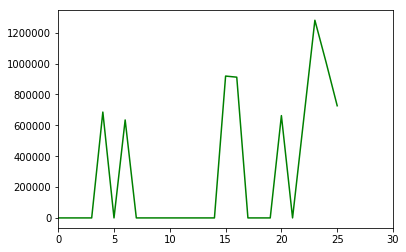

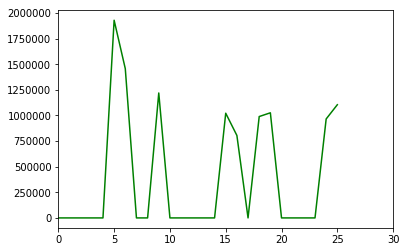

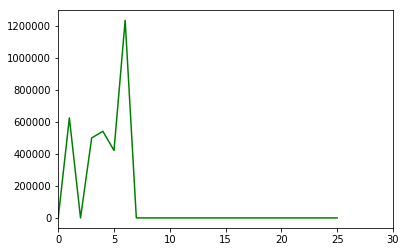

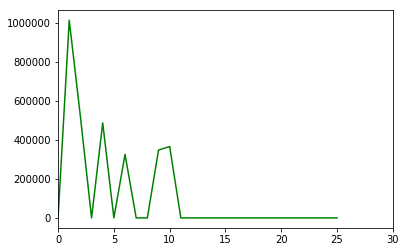

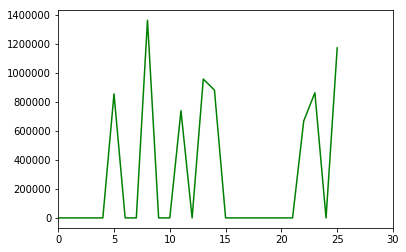

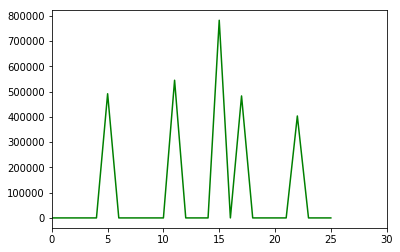

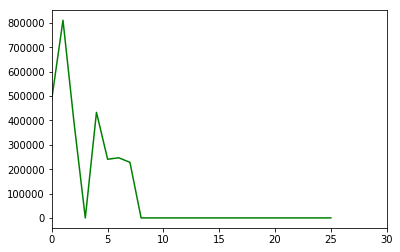

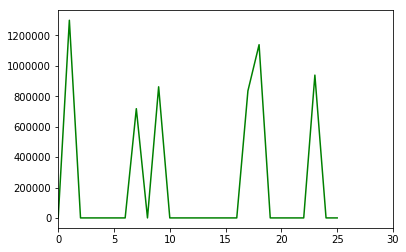

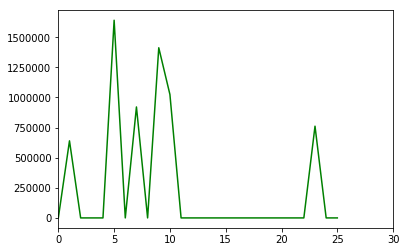

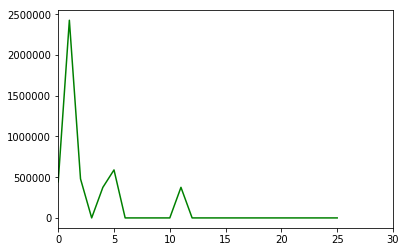

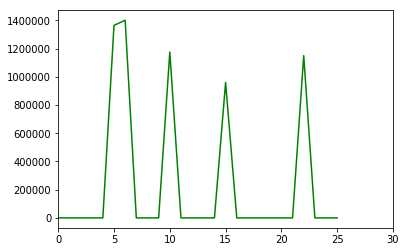

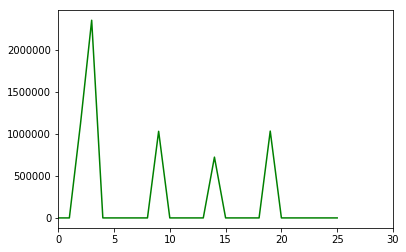

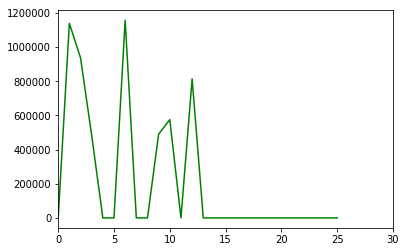

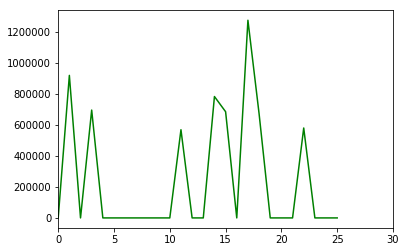

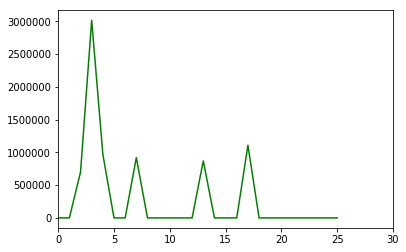

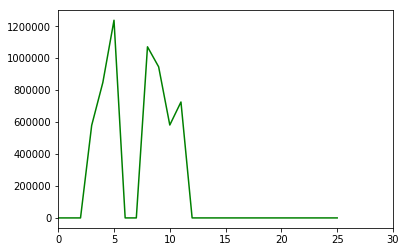

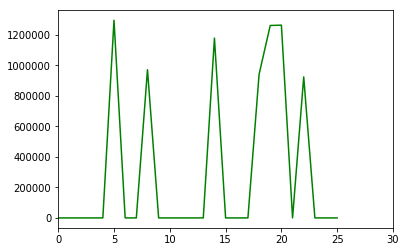

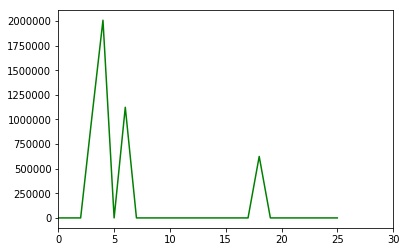

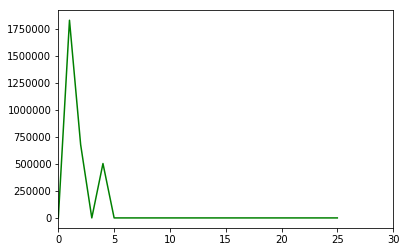

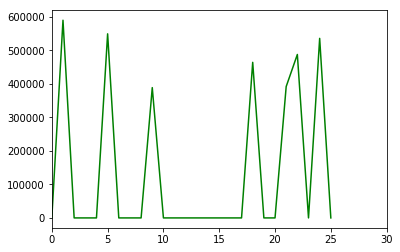

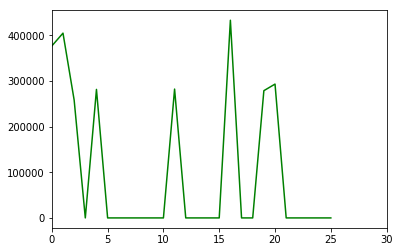

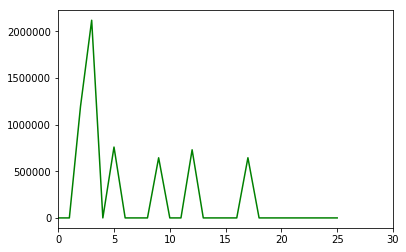

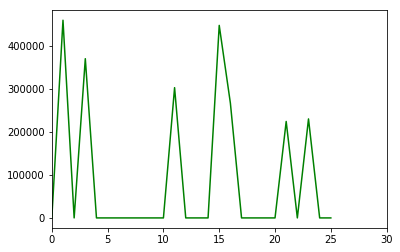

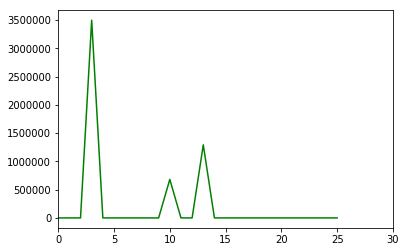

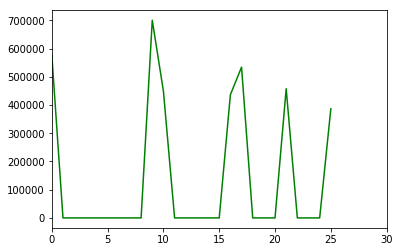

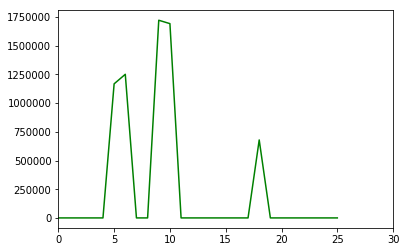

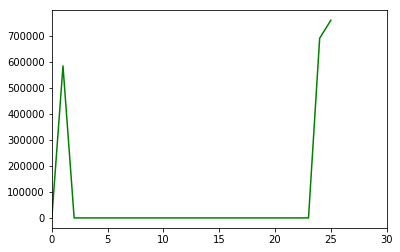

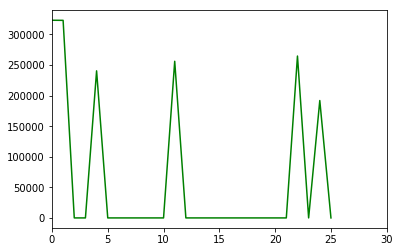

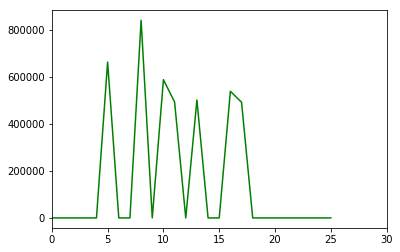

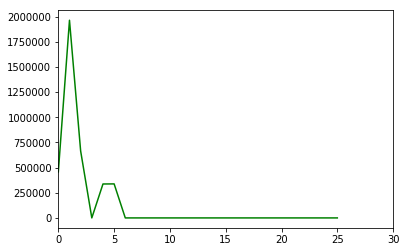

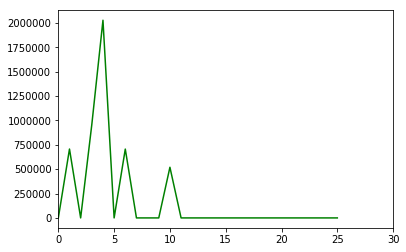

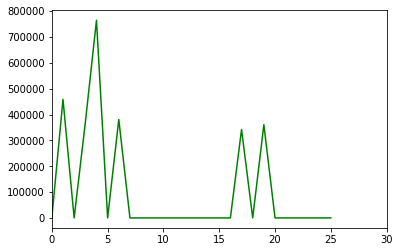

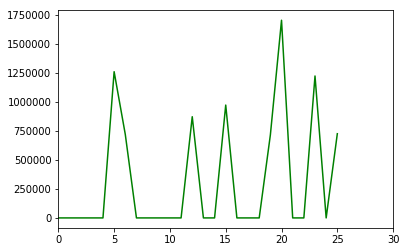

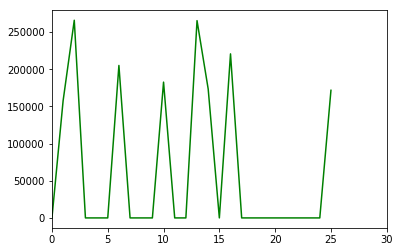

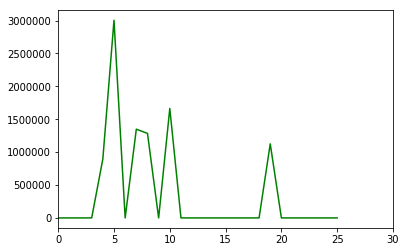

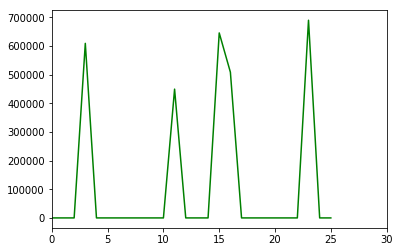

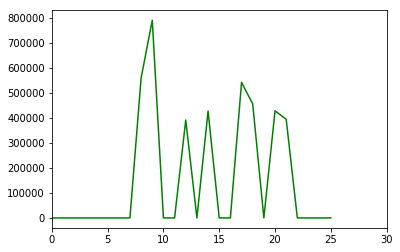

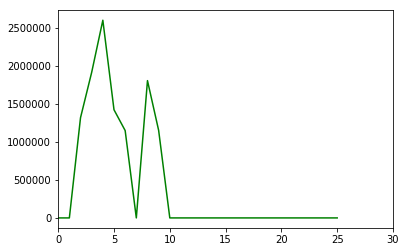

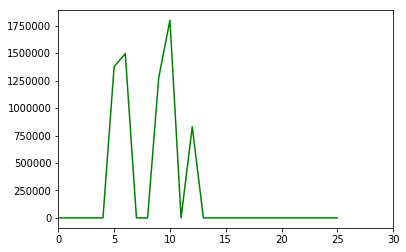

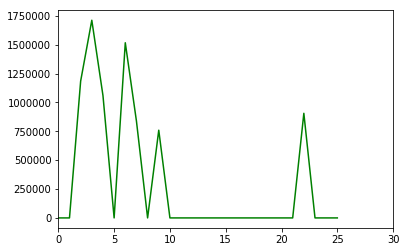

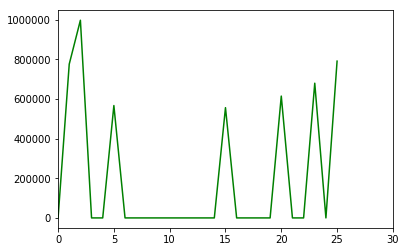

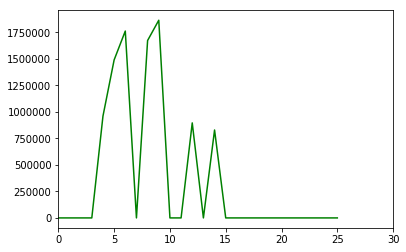

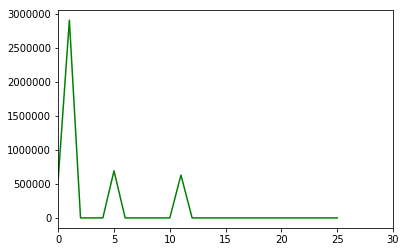

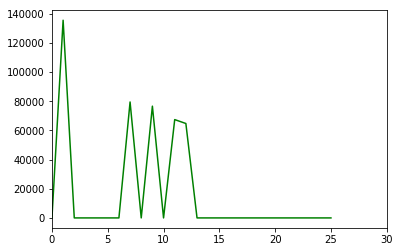

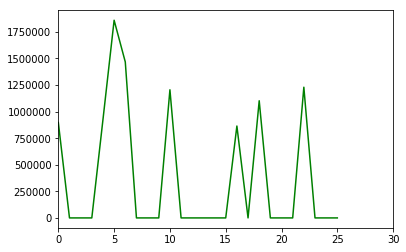

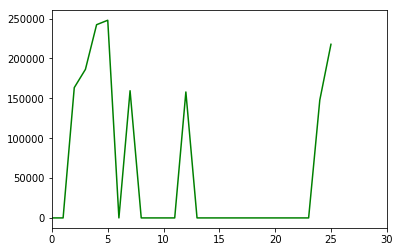

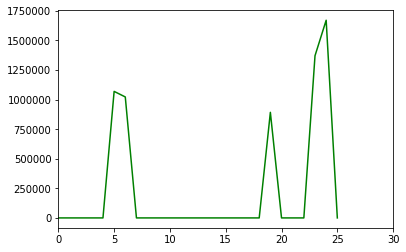

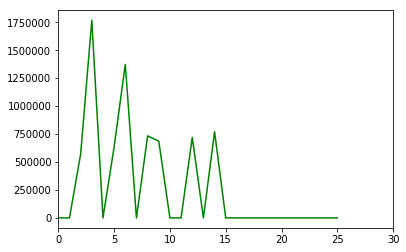

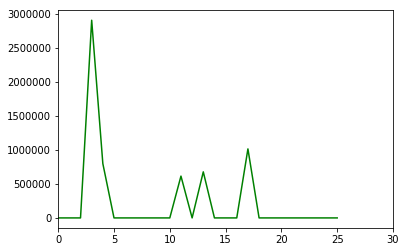

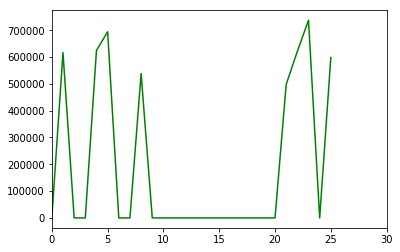

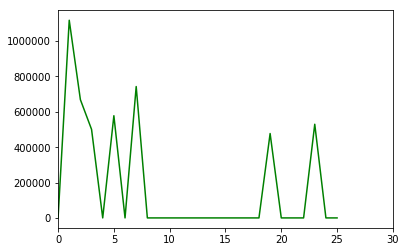

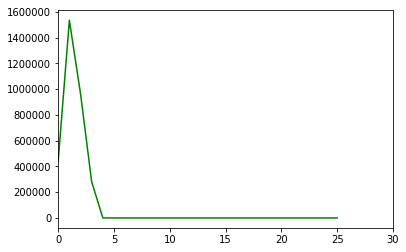

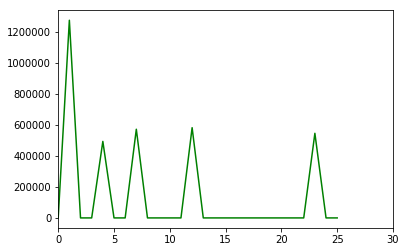

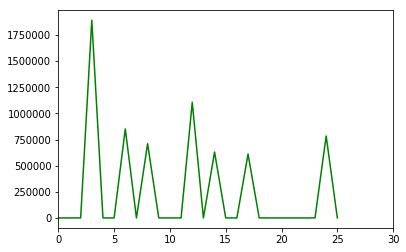

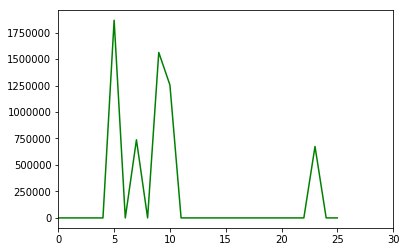

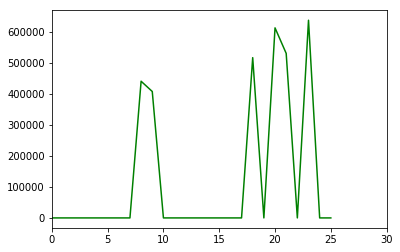

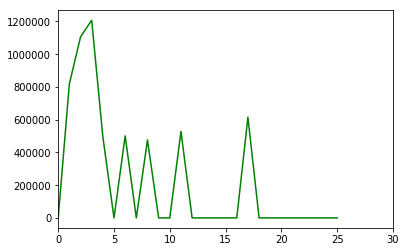

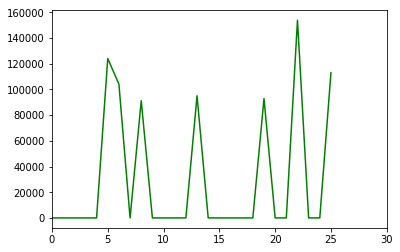

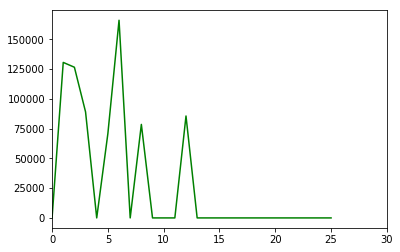

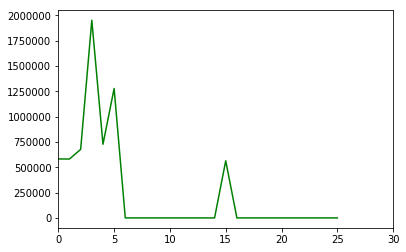

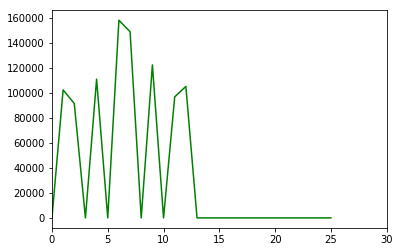

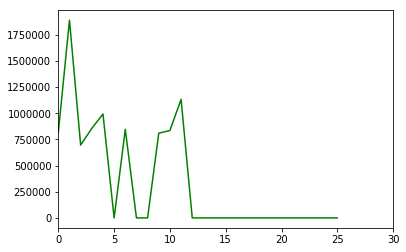

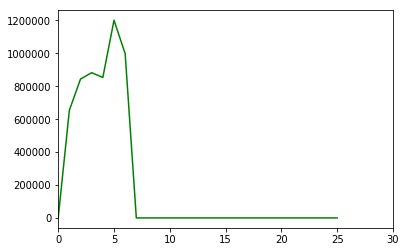

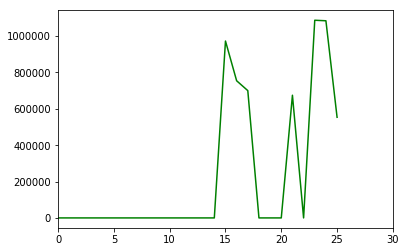

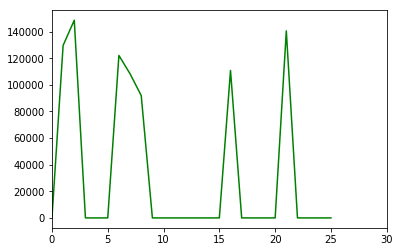

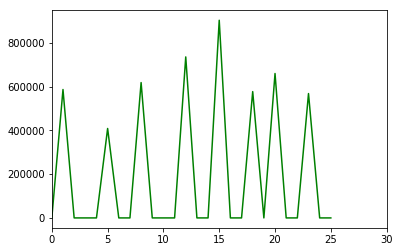

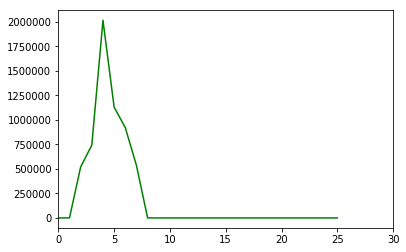

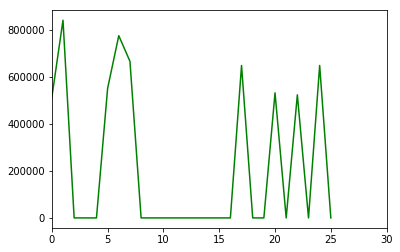

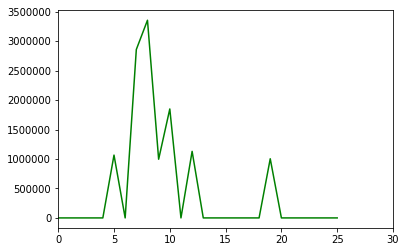

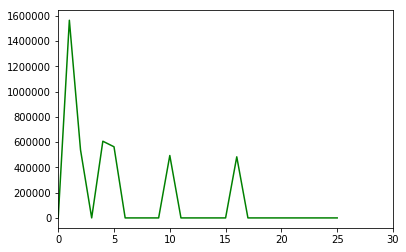

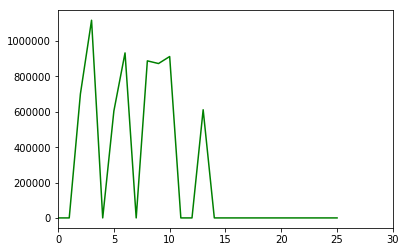

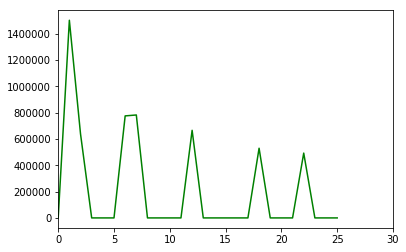

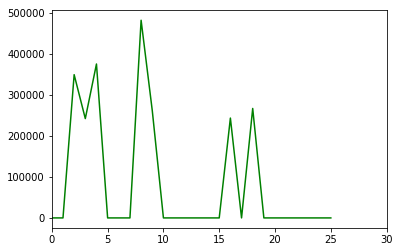

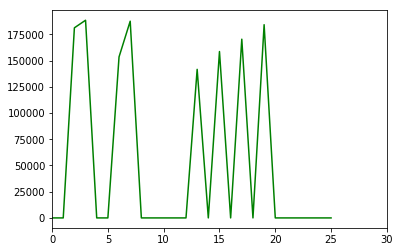

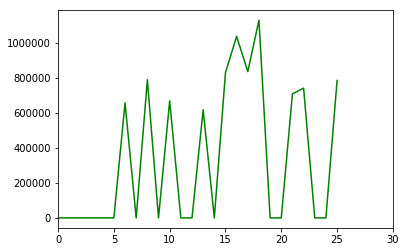

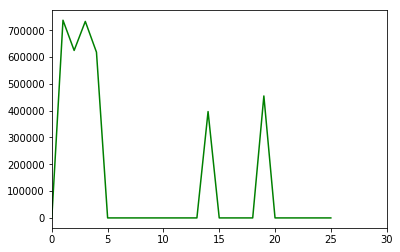

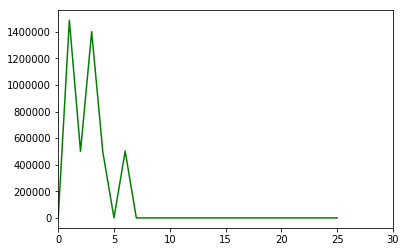

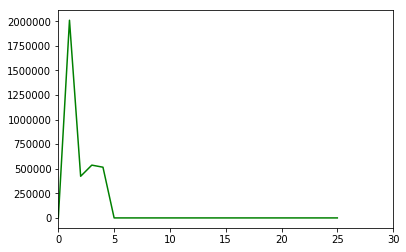

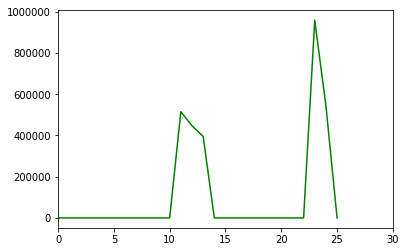

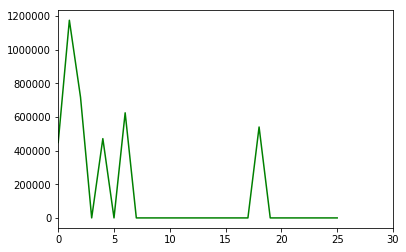

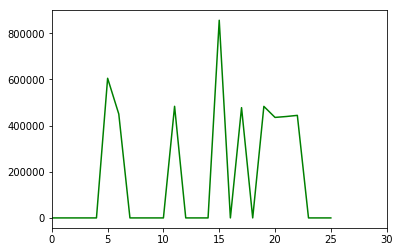

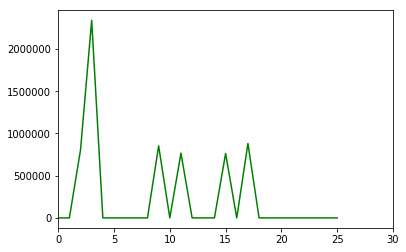

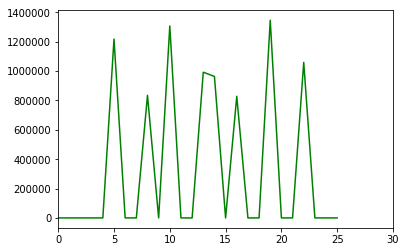

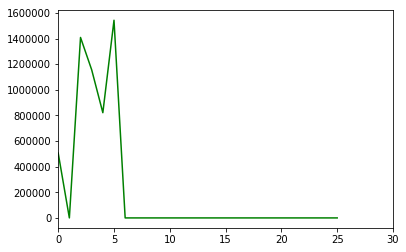

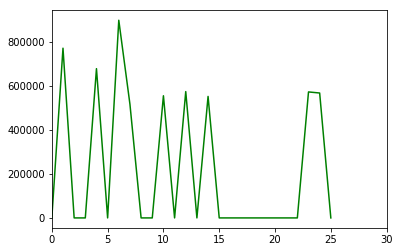

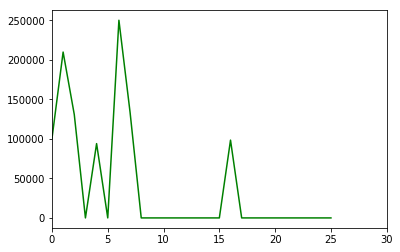

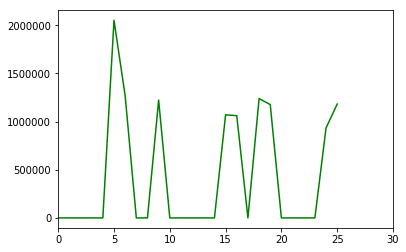

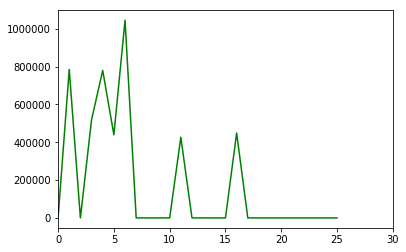

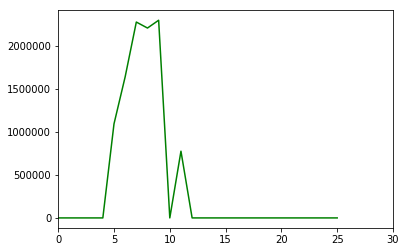

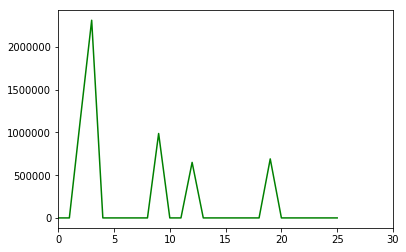

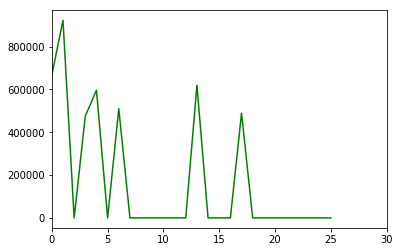

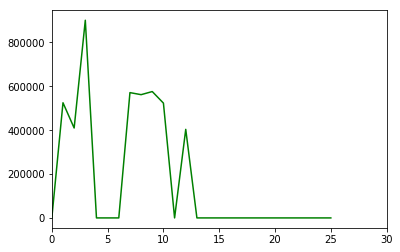

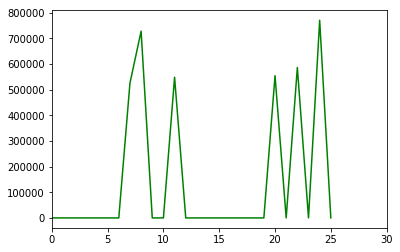

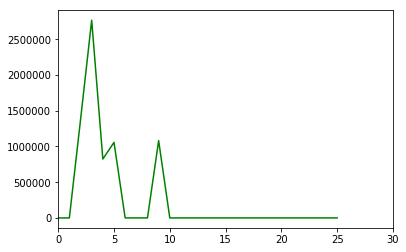

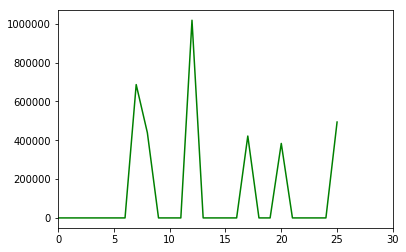

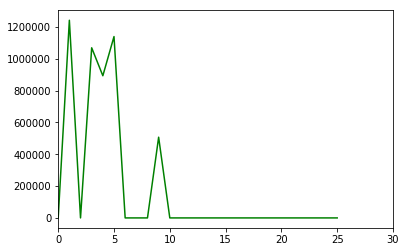

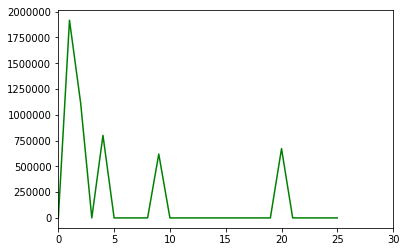

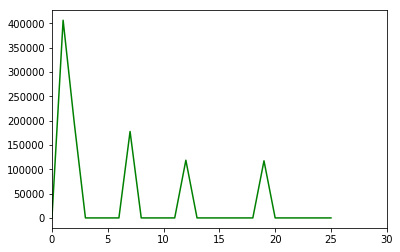

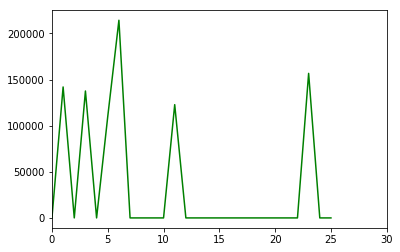

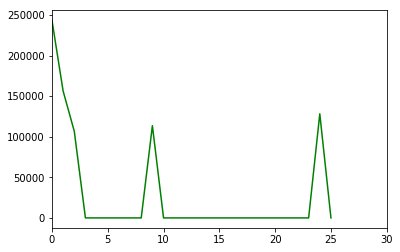

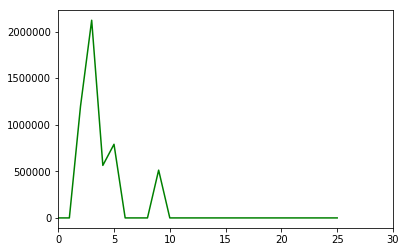

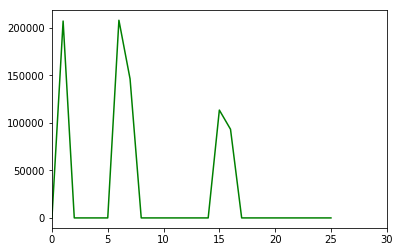

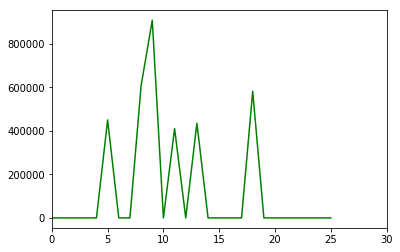

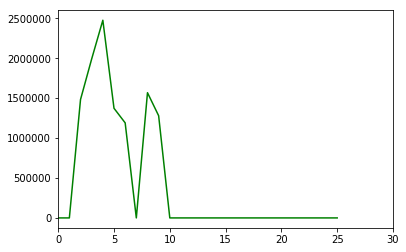

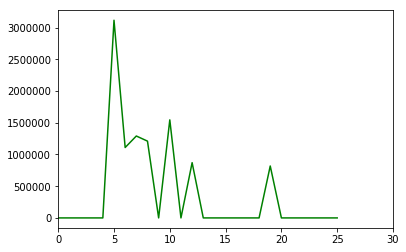

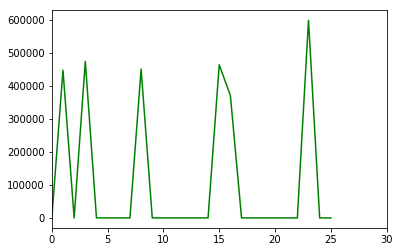

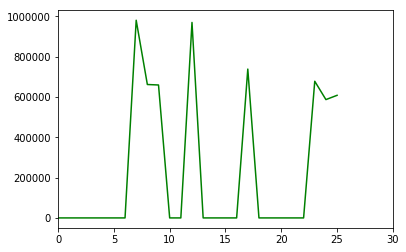

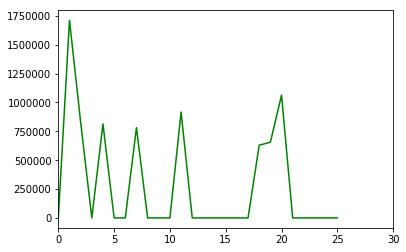

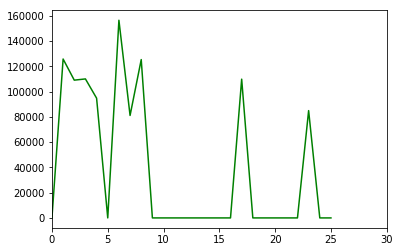

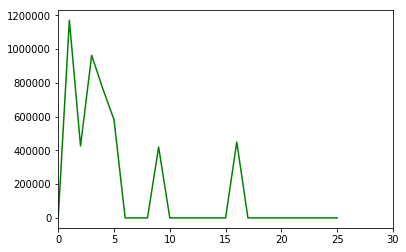

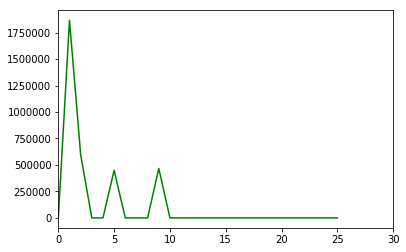

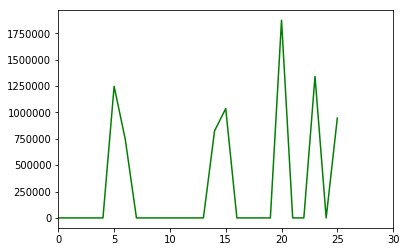

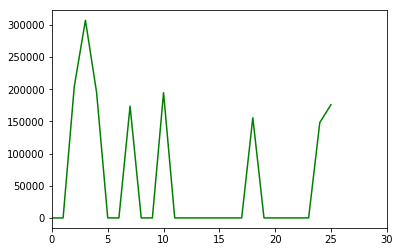

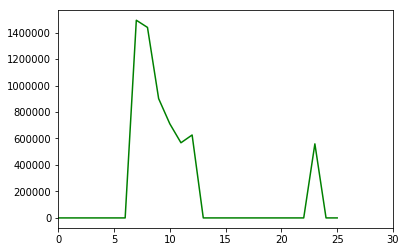

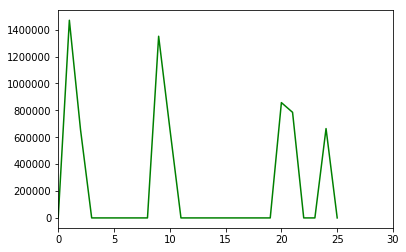

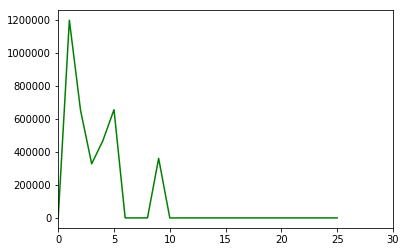

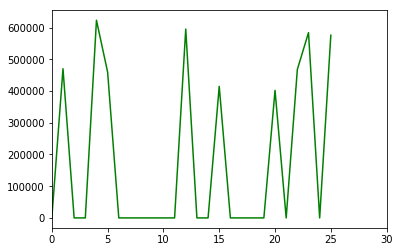

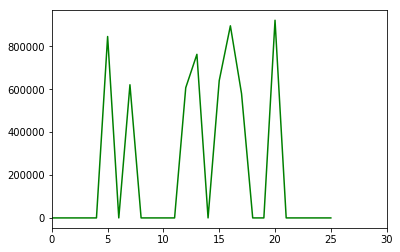

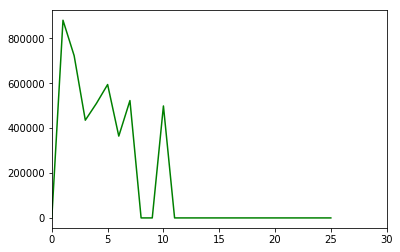

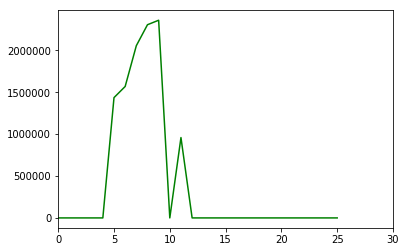

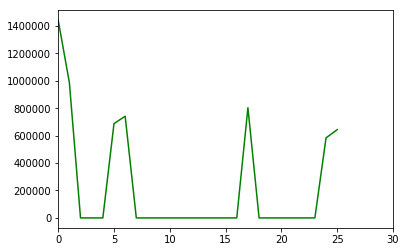

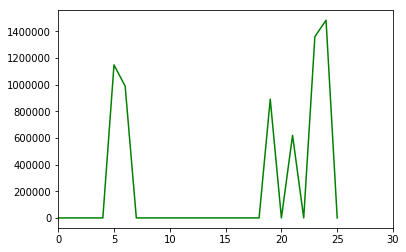

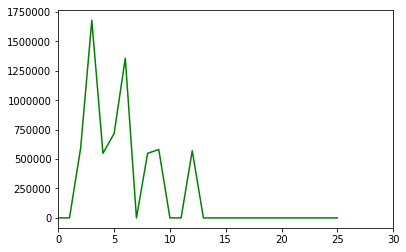

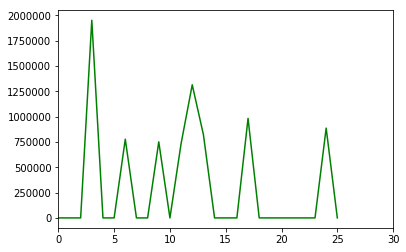

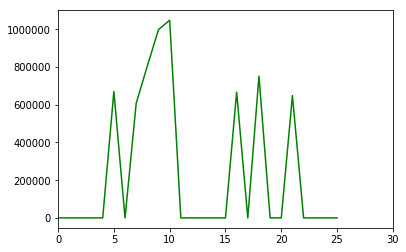

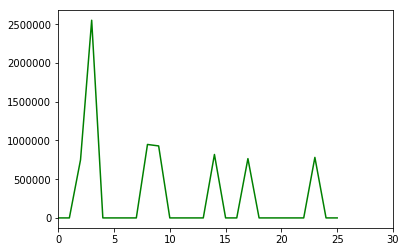

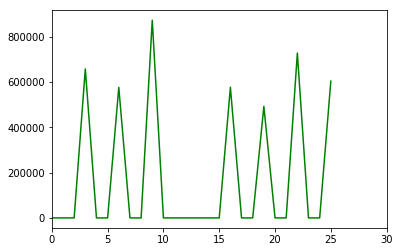

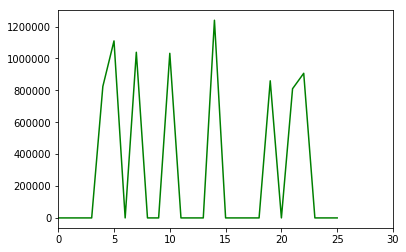

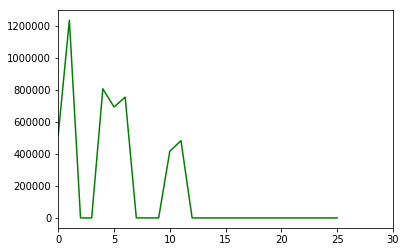

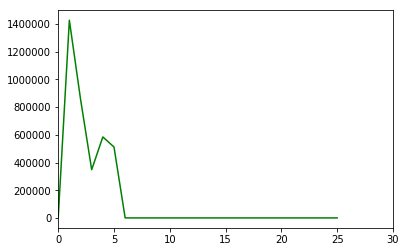

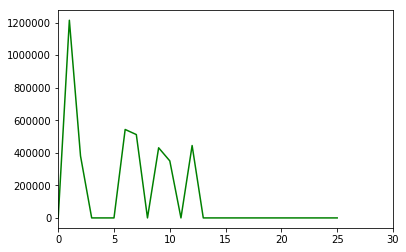

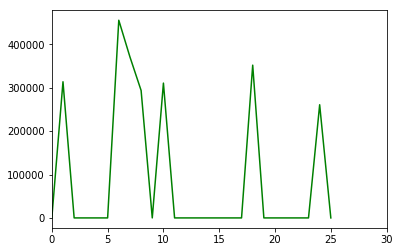

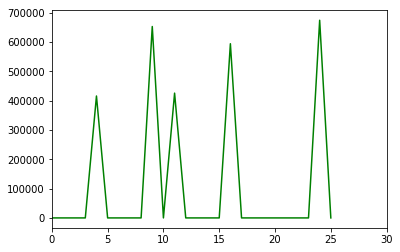

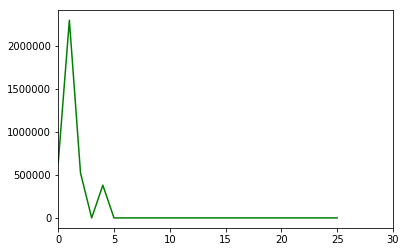

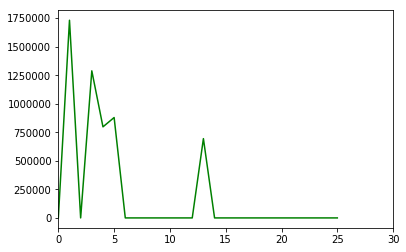

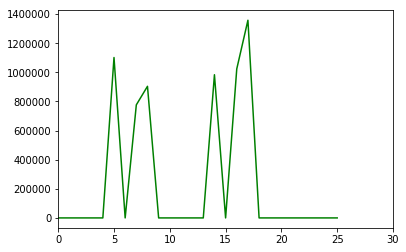

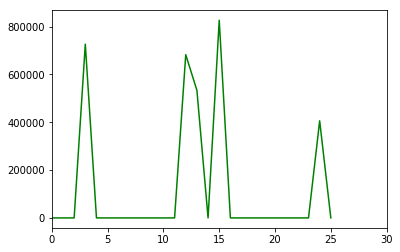

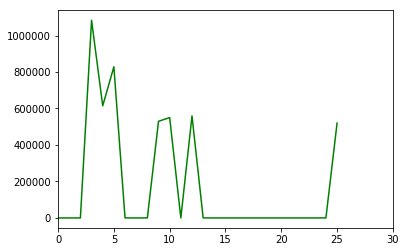

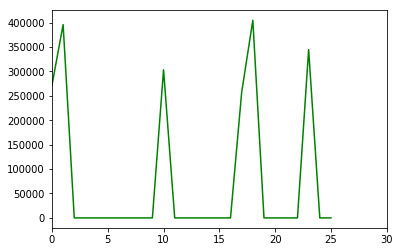

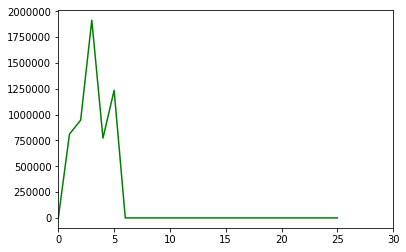

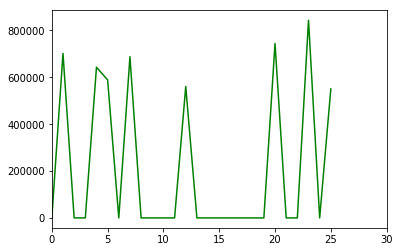

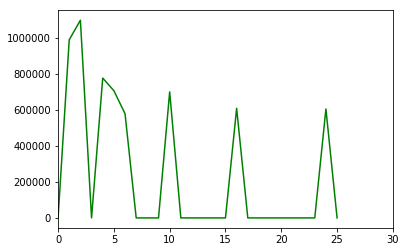

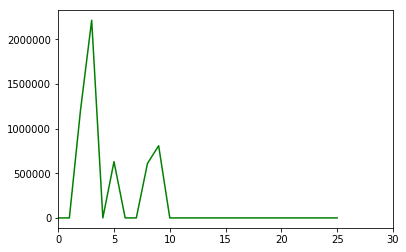

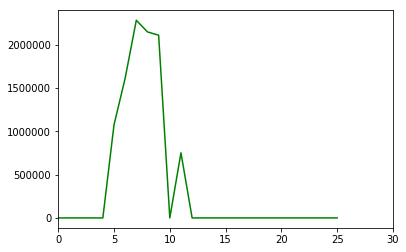

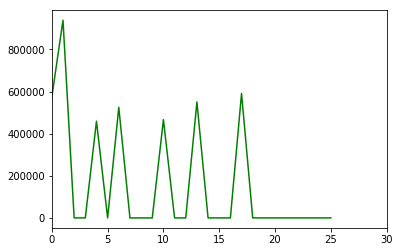

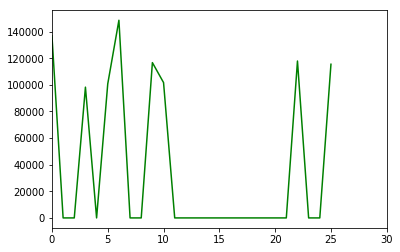

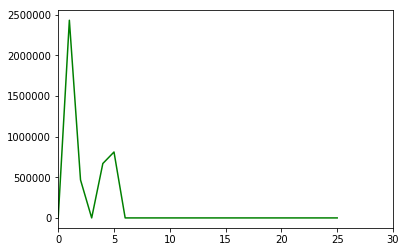

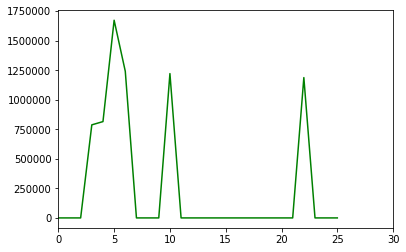

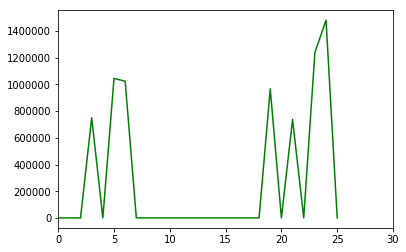

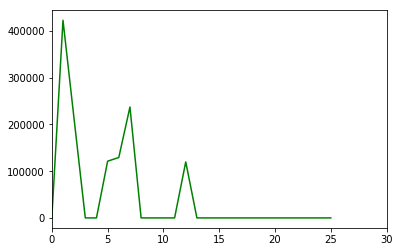

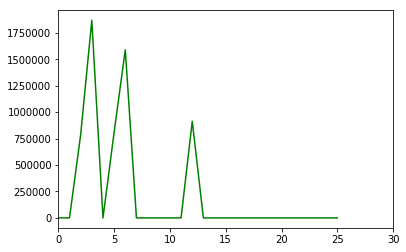

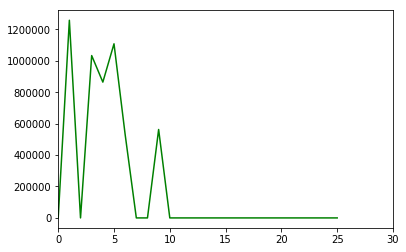

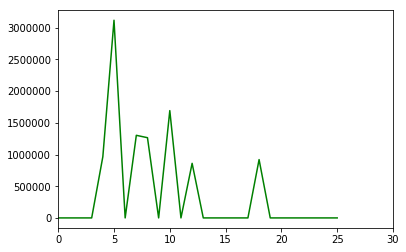

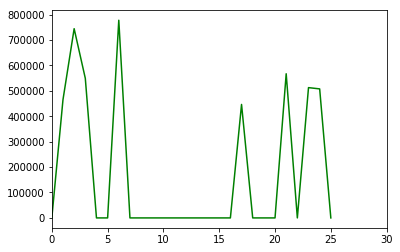

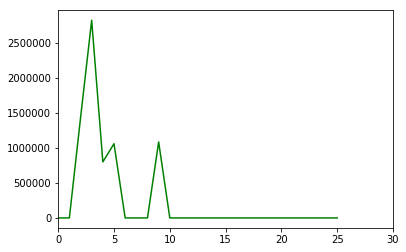

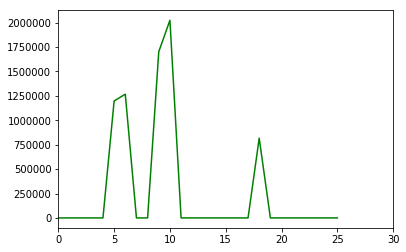

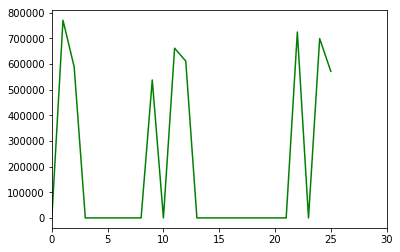

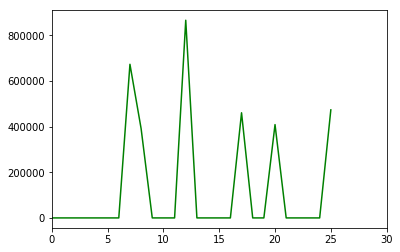

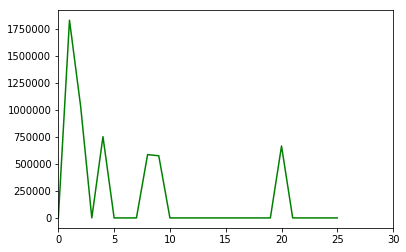

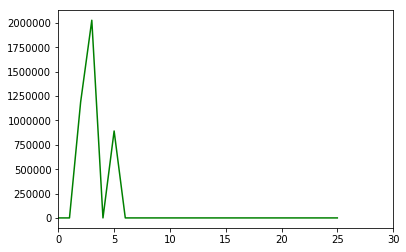

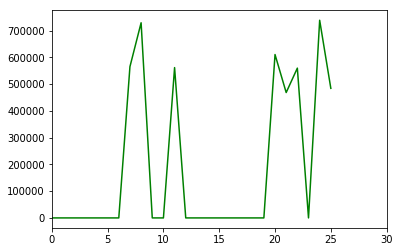

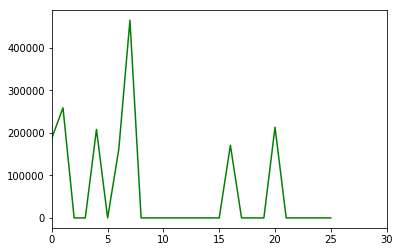

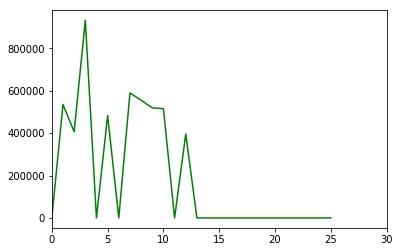

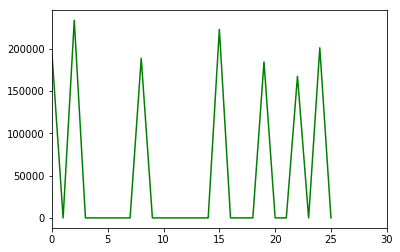

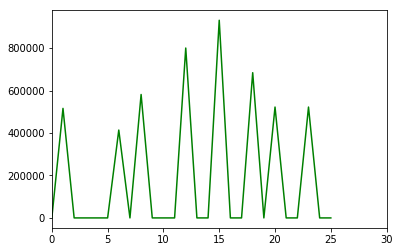

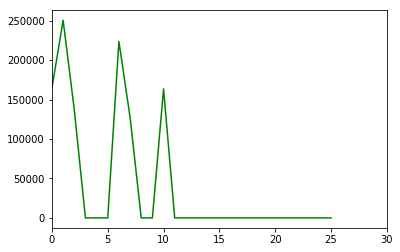

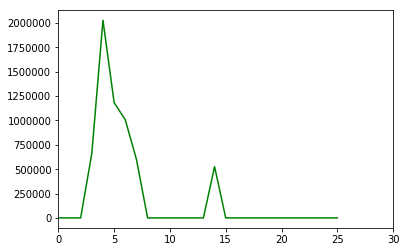

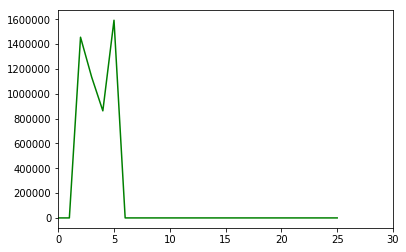

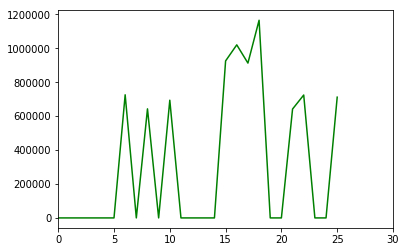

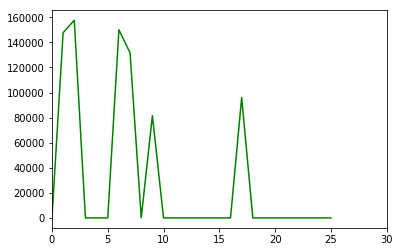

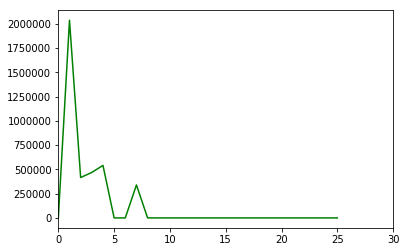

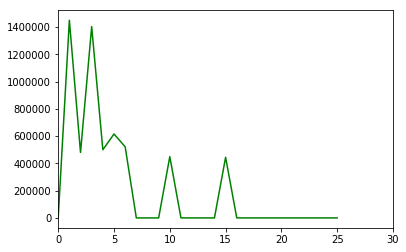

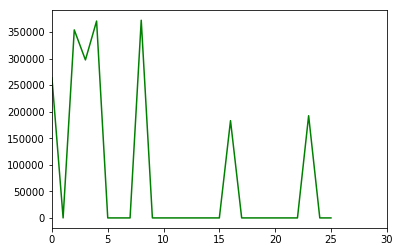

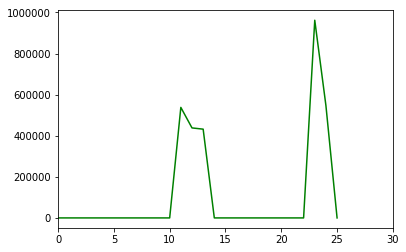

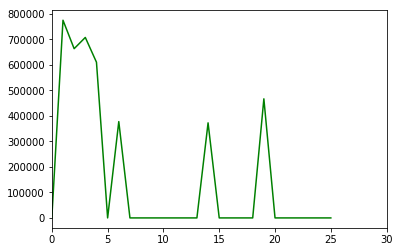

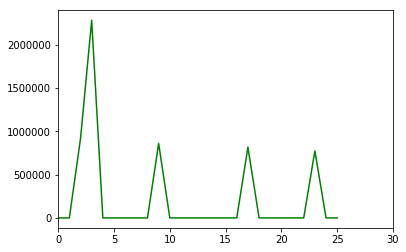

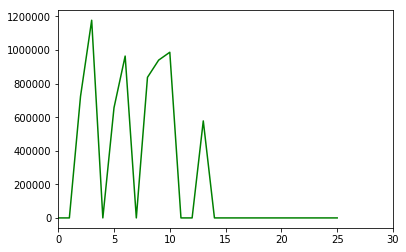

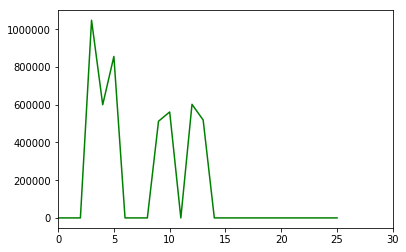

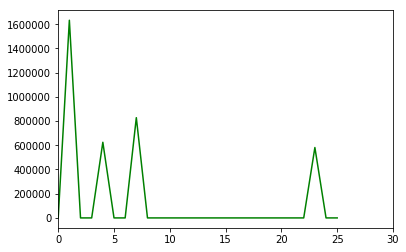

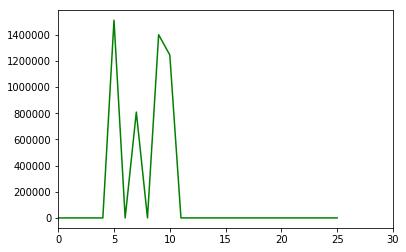

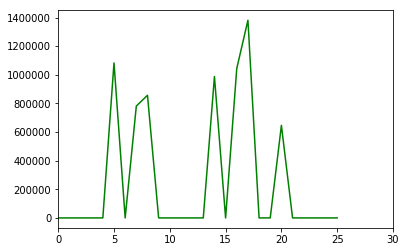

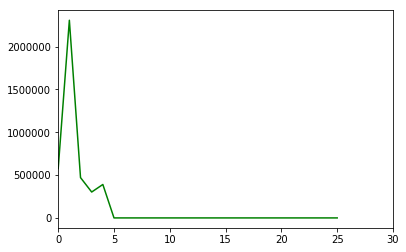

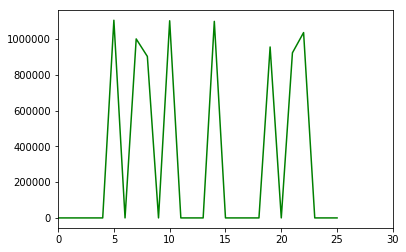

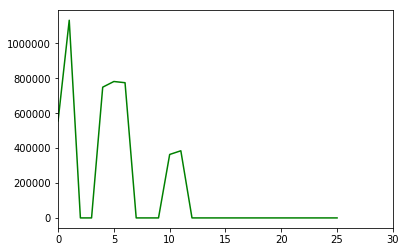

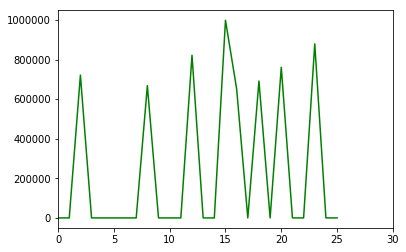

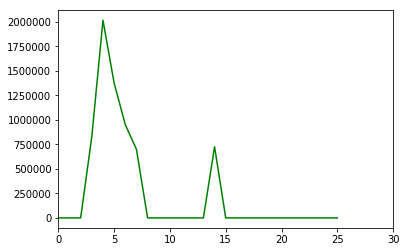

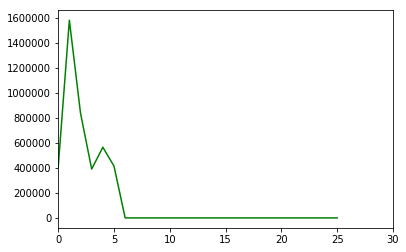

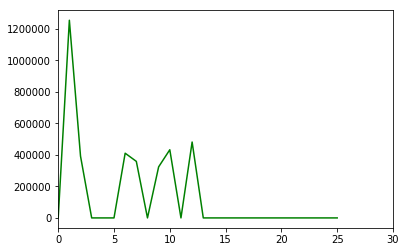

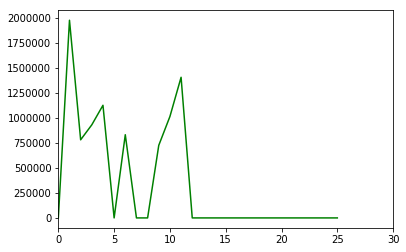

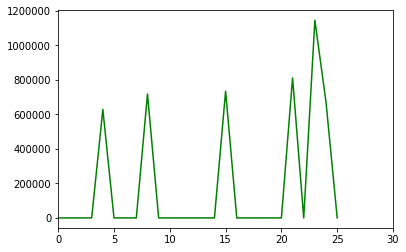

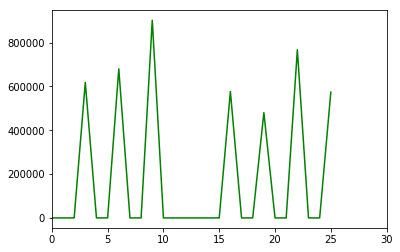

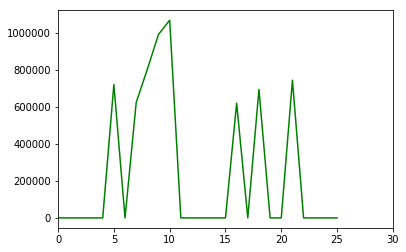

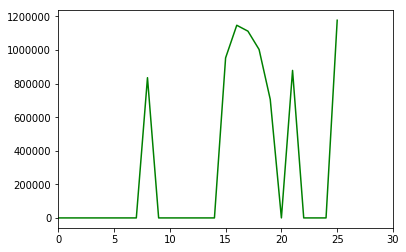

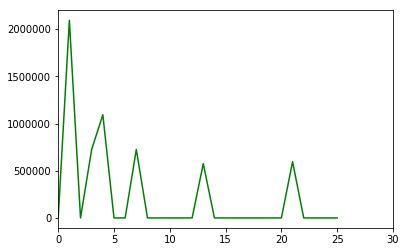

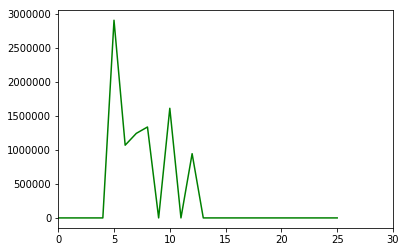

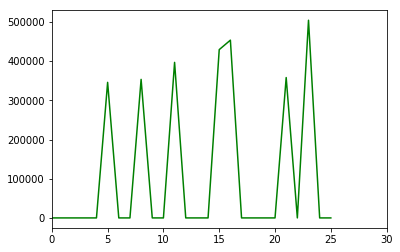

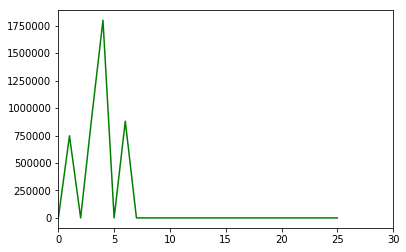

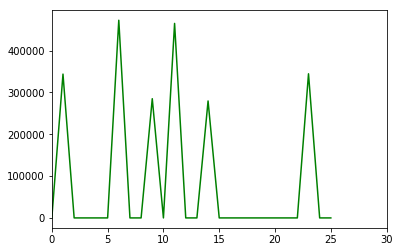

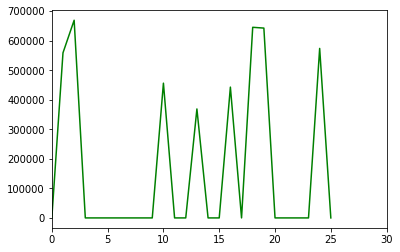

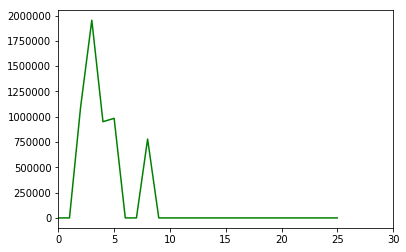

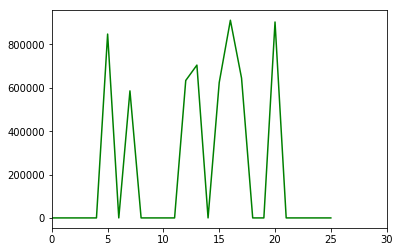

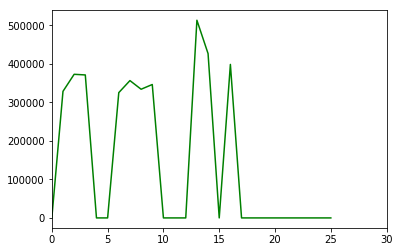

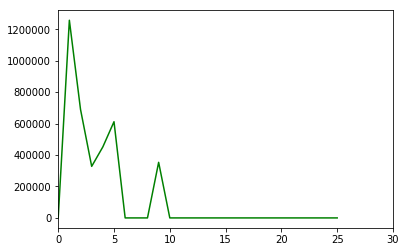

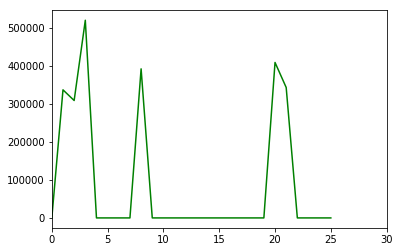

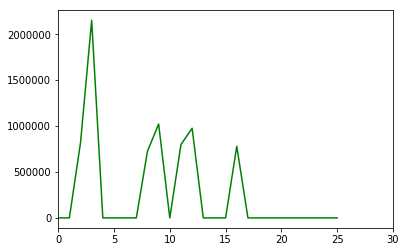

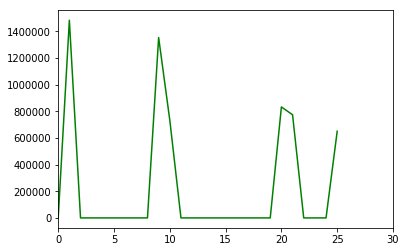

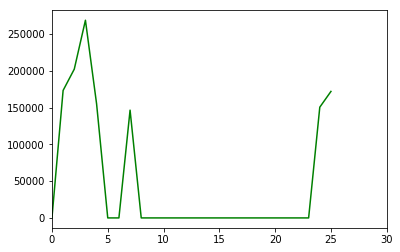

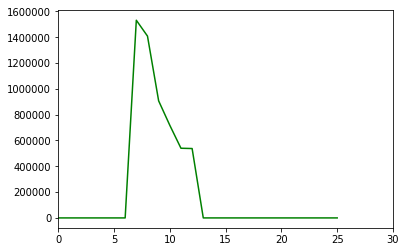

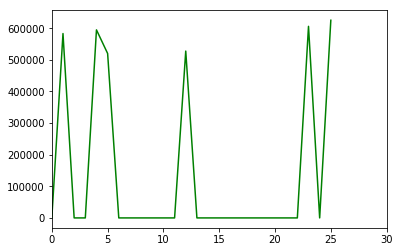

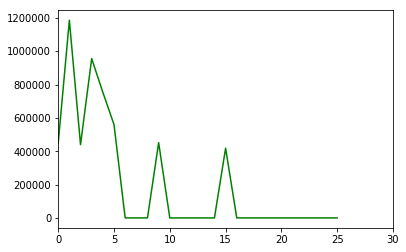

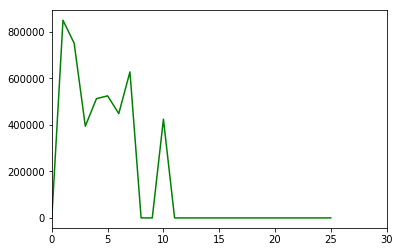

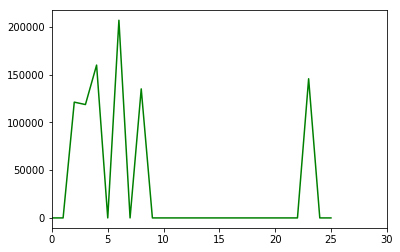

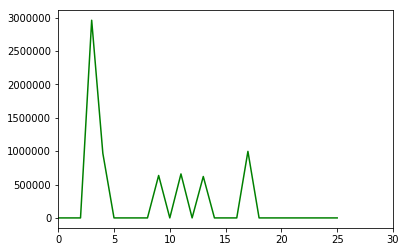

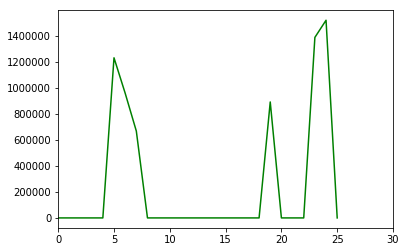

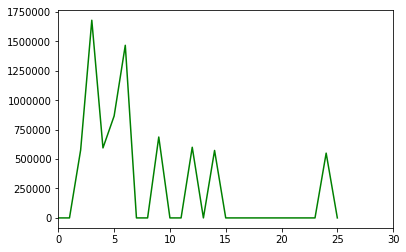

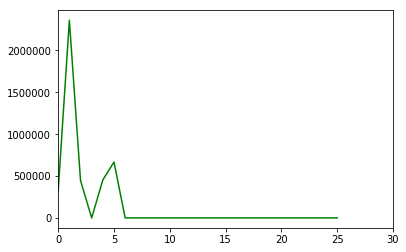

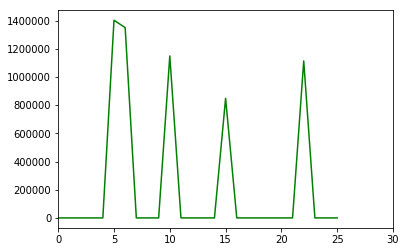

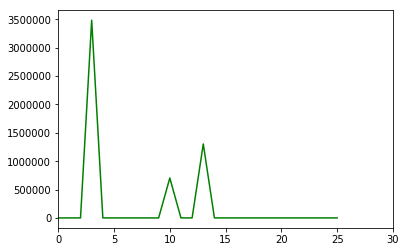

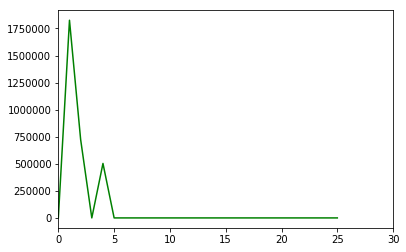

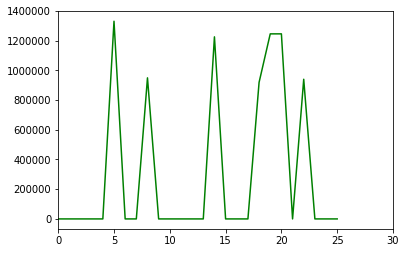

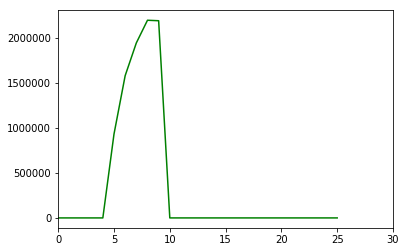

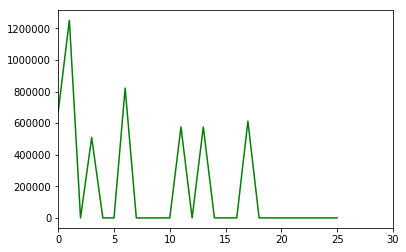

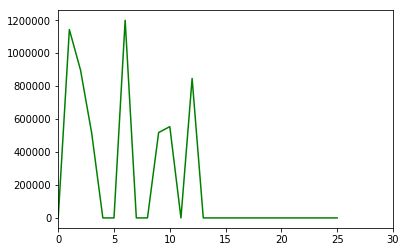

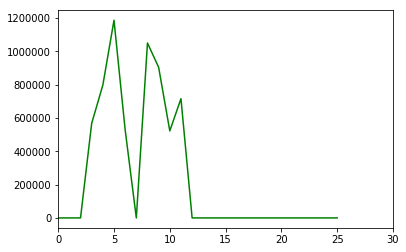

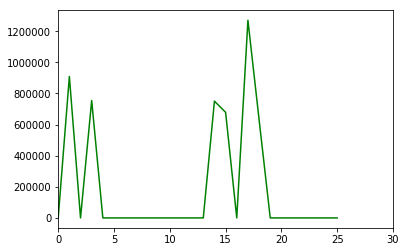

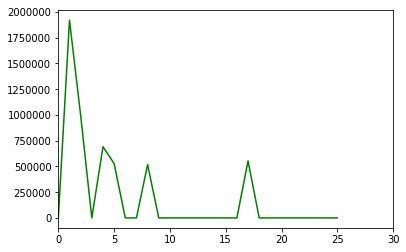

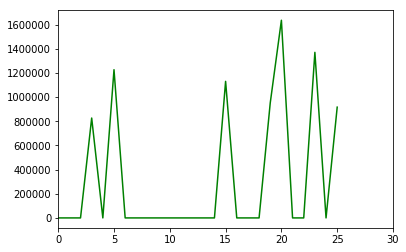

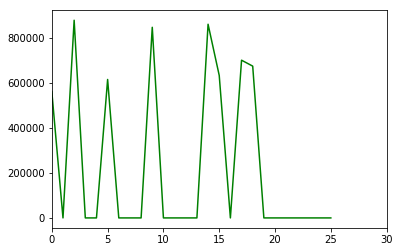

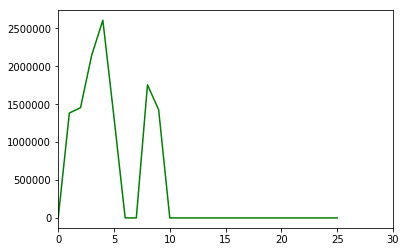

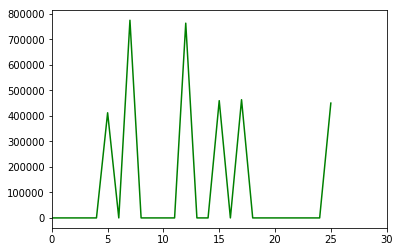

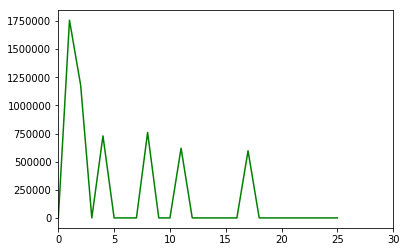

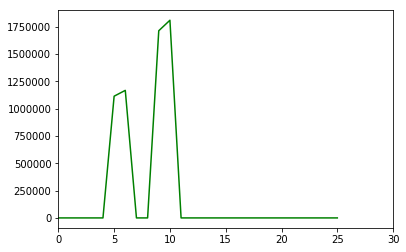

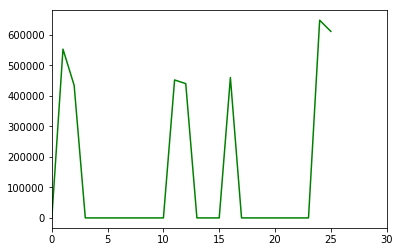

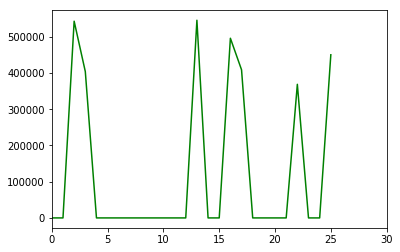

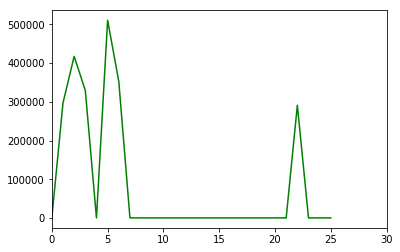

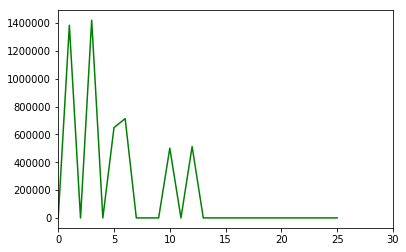

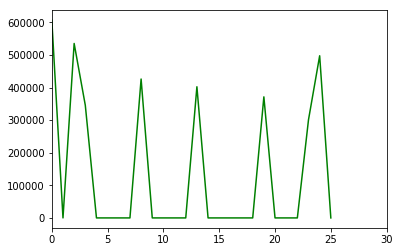

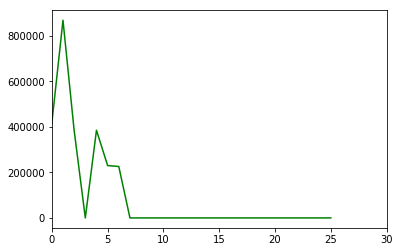

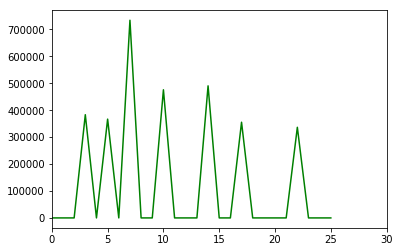

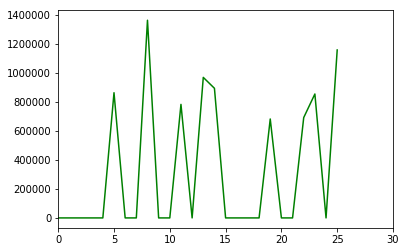

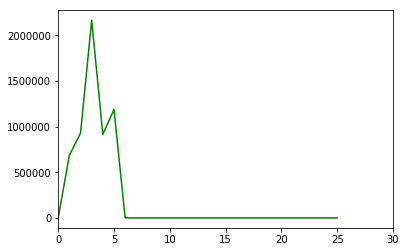

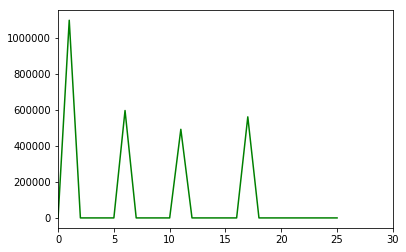

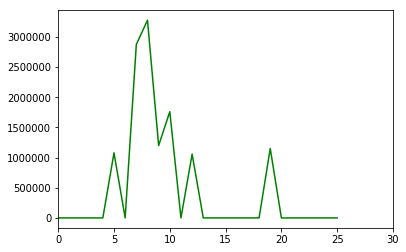

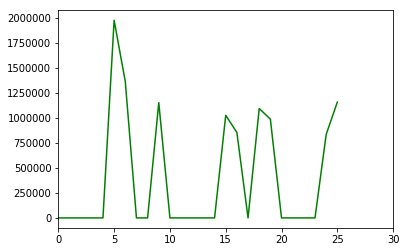

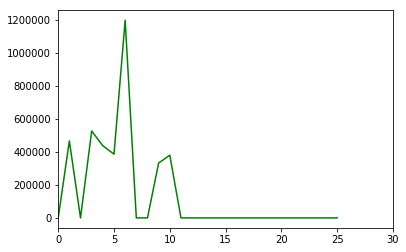

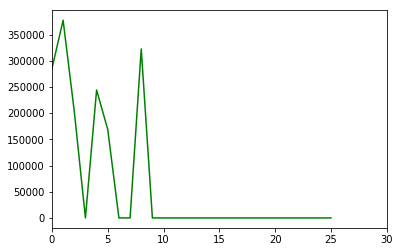

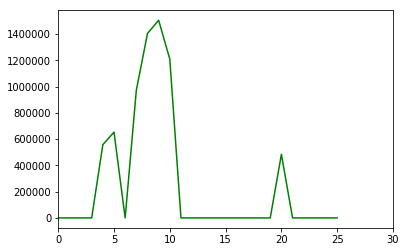

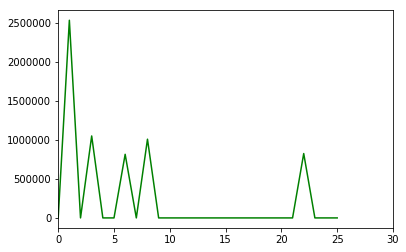

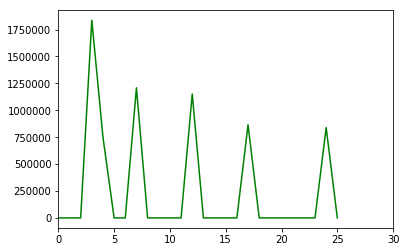

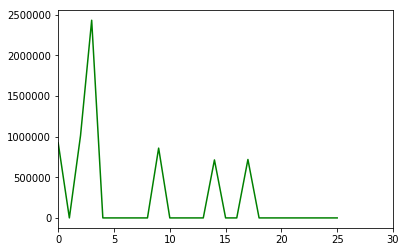

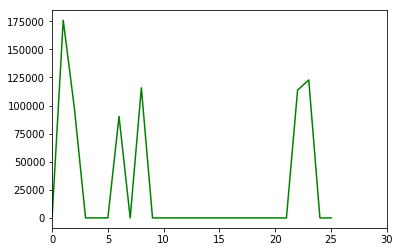

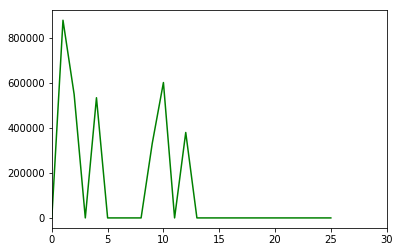

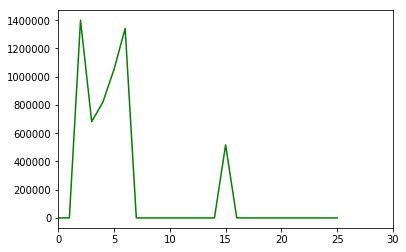

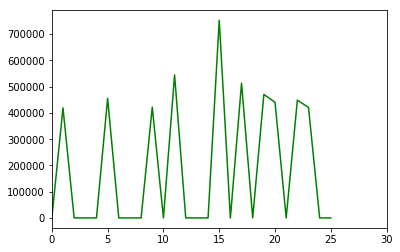

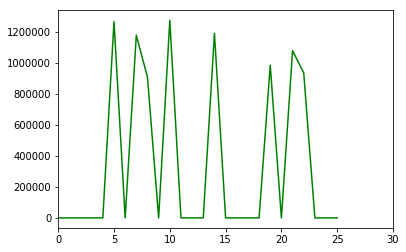

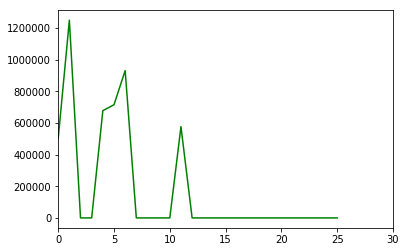

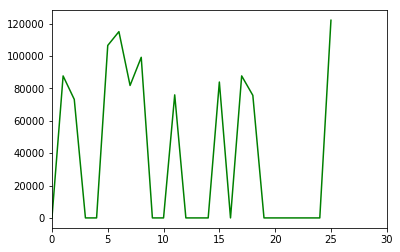

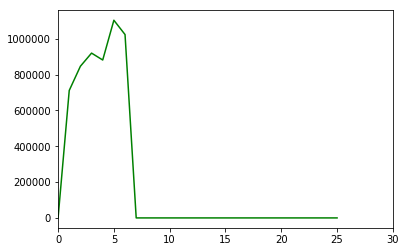

KeyboardInterrupt: 

In [17]:
truck_truck_counter = 0.0
dir_path_3 = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/truck/'
for wavf in glob.glob(dir_path_3+'*.wav'):
#     print 'filename ', wavf
    if( print_Probability(wavf) == 1):
        truck_truck_counter = truck_truck_counter + 1
print ('Percentage: ',truck_truck_counter/fileCount)
#     print ('----------------------------------')

In [ ]:
truck_truck_counter = 0.0
dir_path_3 = '/Users/nawazkh/Masters/Courses/CSCI-B649_Internet_Of_Things/FinalProject/truck-audioset/noisy-data-set/non_truck/'
for wavf in glob.glob(dir_path_3+'*.wav'):
#     print 'filename ', wavf
    if( print_Probability(wavf) == 0):
        truck_truck_counter = truck_truck_counter + 1
print ('Percentage: ',truck_truck_counter/fileCount)
#     print ('----------------------------------')